# Project Description

This project aims to build a predictive model to analyze the relationship between a company's advertising expenditures across various media channels and the resulting sales figures. The dataset includes the following columns:

1. TV: The amount spent on TV advertising.
2. Radio: The amount spent on radio advertising.
3. Newspaper: The amount spent on newspaper advertising.
4. Sales: The sales achieved.

I will begin by building a simple linear regression model using only one variable—the one which has the highest coefficient—indicating the strongest relationship with sales. This will help us understand the impact of that specific advertising medium in isolation.

To accomplish this, I will use two different approaches:

1. Statsmodels:
2. Scikit-learn:

By leveraging these approaches, the objective is to determine the effectiveness of each advertising medium and to develop a model that can accurately predict sales based on advertising spend.

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [40]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from google.colab import files

uploaded = files.upload()

Saving advertising.csv to advertising.csv


# Reading the Dataset

In [5]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


We can see that the first three are the predictive variables and the 4th column is the target variable

In [7]:
#checking the shape

advertising.shape

(200, 4)

There are 200 rows and 4 columns in the dataset

In [8]:
#Checking for missing values in the data-set

advertising.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
# Checking for data types

advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# Checking other statistical informations to get an idea if the dataset have outliers

advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


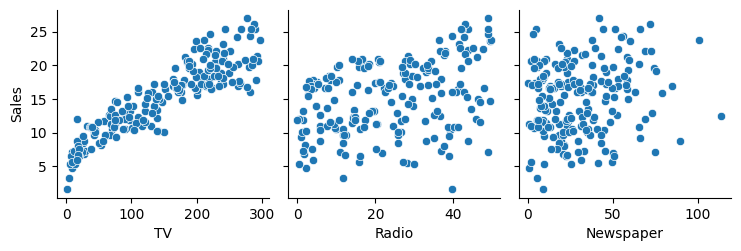

In [14]:
# Visualising the dataset using pairplots

sns.pairplot(data = advertising, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales')
plt.show()

As I can see that the most prominent linear relationship can be seen between TV and sales, so as I can use only one variable for Simple Linear Regression - I will use the variable "TV".

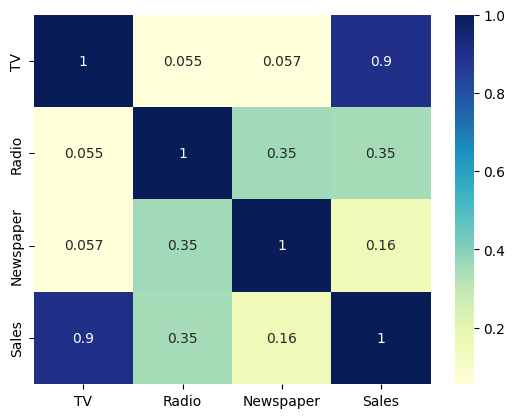

In [16]:
#Checking the co-relation using heatmaps

sns.heatmap(advertising.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# Building the Model

In [19]:
#creating X and y

X = advertising ['TV']
y = advertising ['Sales']

In [21]:
# doing the train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

Using random so that it seeds the random number and same train- test split is achieved when we build the same model using Sklearn

In [23]:
#confirming the shape

X_train.shape

(140,)

In [24]:
#Adding constant to X_train

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [25]:
#Creating the object 'lr'

lr = sm.OLS(y_train, X_train_sm)

In [26]:
#Fitting the model

lr_model = lr.fit()

In [27]:
#Checking the parameters

lr_model.params

,0
const,6.948683
TV,0.054546


So basically the formula concluded -

Sales = 6.95 + 0.05 TV

In [28]:
#Checking summary of the SLR Model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.52e-52
Time:                        08:36:59   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observations :

1. R-squared - The value of R-squared is 0.816. So it explains the 82% variance in sales.

2. p-value - The low p-value (0.00) indicates that the co-efficients obtained are defininitely not by chance

3. Prob (F-statistics) - Low value incidicates that the fit is not by chance

In [32]:
#Creating y_train predictions

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

,0
74,18.588747
3,15.212365
185,18.130563
26,14.743271
90,14.274178


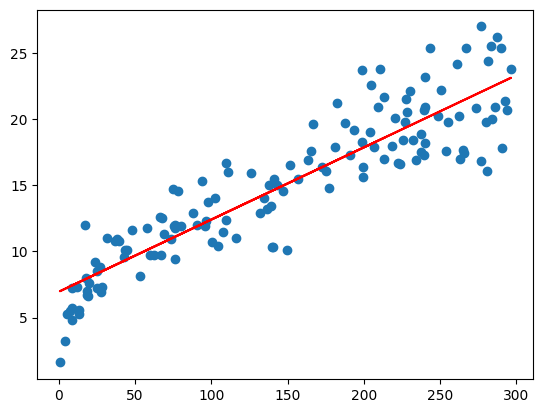

In [33]:
#Visualising the model

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

# 3. Residual Analysis

In [34]:
#creating res

res = y_train - y_train_pred
res.head()

,0
74,-1.588747
3,1.287635
185,4.469437
26,0.256729
90,-0.274178


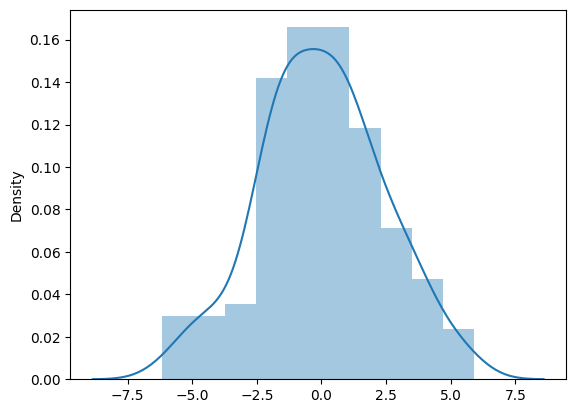

In [35]:
#ploting the residual distribution

sns.distplot(res)
plt.show()

Analysis of the residual -

1. It shows a normal distribution
2.  The distribution is centered around 0.

Thus the fundamental assumptions of linear regression

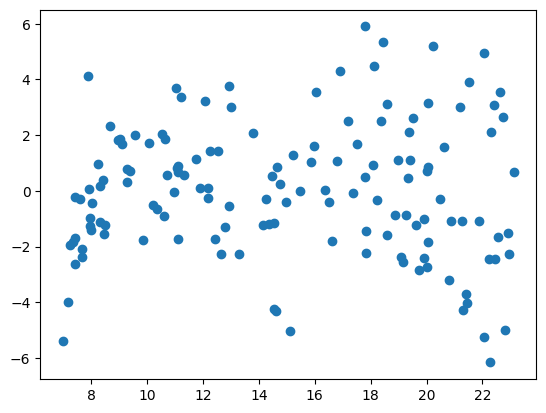

In [36]:
#Pattern check on residuals

plt.scatter(y_train_pred, res)
plt.show()

The assumption of LR that residuals are independent of other is respected.

# 4. Prediction on Test Set

In [37]:
#before we make predictions on the test set, w ewill have to add constant to the X_test

X_test_sm = sm.add_constant(X_test)

In [38]:
#Prediction on y_test

y_test_pred = lr_model.predict(X_test_sm)

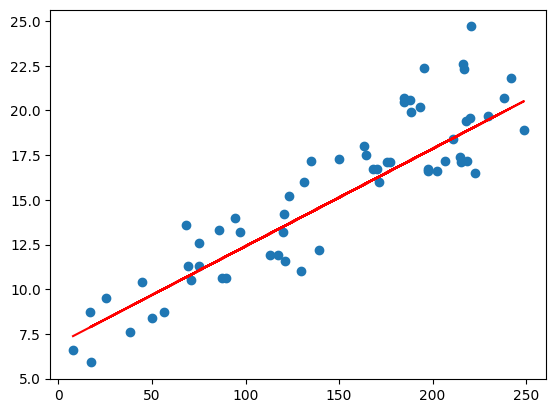

In [39]:
#plotting

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# 5. Evaluation of the Model

In [43]:
#Computing the mean squared error

mse = mean_squared_error(y_true = y_test, y_pred= y_test_pred)
mse

4.077556371826953

Will compute R2 value for easier understanding

In [42]:
#computing the r-squared

r2= r2_score(y_true = y_test, y_pred= y_test_pred)
r2

0.792103160124566

### Conclusion

The training model achieved an R² value of 0.81, while the test model achieved an R² value of 0.79. This small variance of less than 5% indicates that the model is robust and performs well on unseen data. Therefore, the model is capable of making accurate predictions for new, unseen datasets, ensuring reliable forecasting of sales based on advertising spend.